In [2]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option('mode.copy_on_write', True)  # pandas 2.0
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7  # max number of rows to display

# NumPy options
np.set_printoptions(precision = 2, suppress=True)  # suppress scientific notation

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

In [3]:
# import the dataset
mpg_data = sm.datasets.get_rdataset("mpg", "ggplot2")
mpg = mpg_data.data

In [4]:
# Description
print(mpg_data.__doc__)

.. container::

   === ===============
   mpg R Documentation
   === ===============

   .. rubric:: Fuel economy data from 1999 to 2008 for 38 popular models
      of cars
      :name: mpg

   .. rubric:: Description
      :name: description

   This dataset contains a subset of the fuel economy data that the EPA
   makes available on https://fueleconomy.gov/. It contains only models
   which had a new release every year between 1999 and 2008 - this was
   used as a proxy for the popularity of the car.

   .. rubric:: Usage
      :name: usage

   .. code:: R

      mpg

   .. rubric:: Format
      :name: format

   A data frame with 234 rows and 11 variables:

   manufacturer
      manufacturer name

   model
      model name

   displ
      engine displacement, in litres

   year
      year of manufacture

   cyl
      number of cylinders

   trans
      type of transmission

   drv
      the type of drive train, where f = front-wheel drive, r = rear
      wheel drive, 4 = 4wd

   ct

In [5]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.80,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.80,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.00,2008,4,manual(m6),f,20,31,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
231,volkswagen,passat,2.80,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.80,1999,6,manual(m5),f,18,26,p,midsize
233,volkswagen,passat,3.60,2008,6,auto(s6),f,17,26,p,midsize


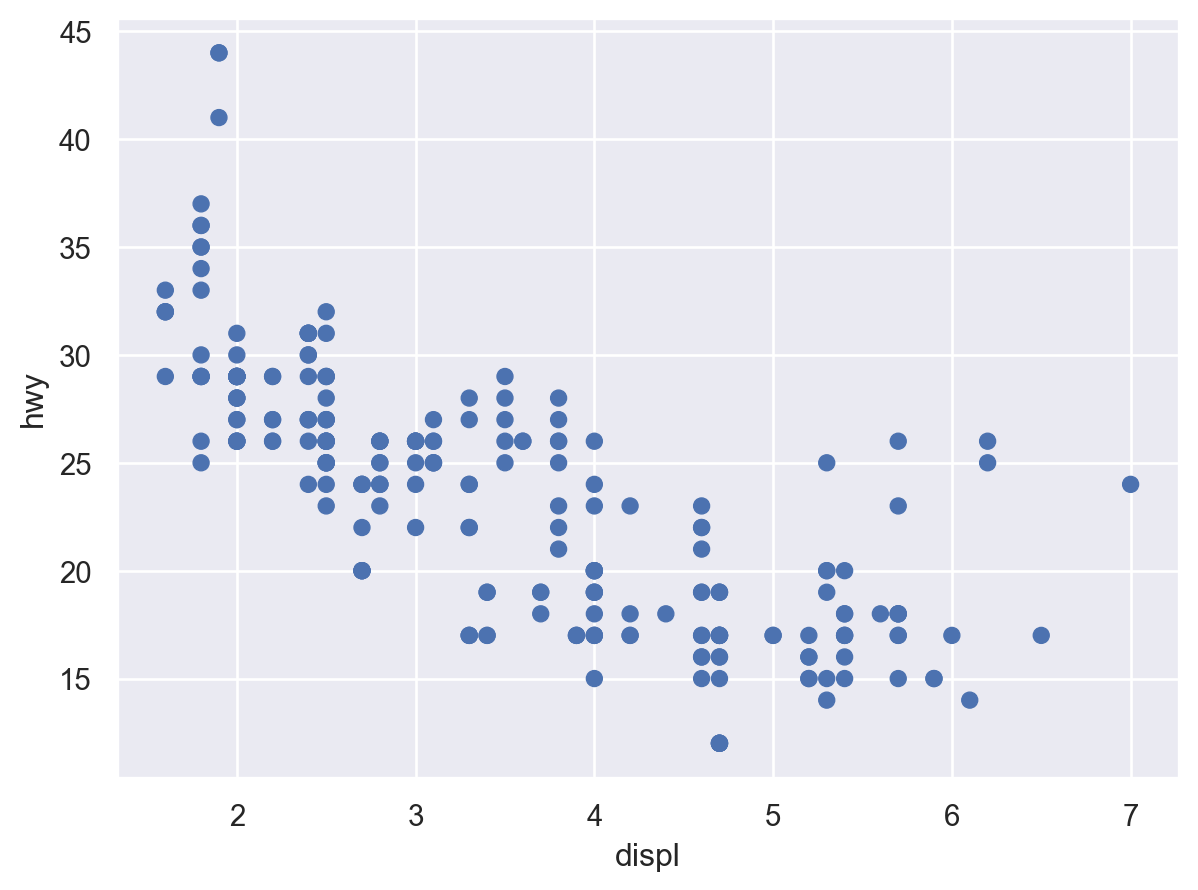

In [6]:
# method chain
(
    so.Plot(mpg, x="displ", y="hwy") # empty plot을 생성하고, x, y축에 mapping할 mpg 데이터의 변수를 지정
    .add(so.Dot()) # layer를 추가하여, points들을 Dot이라는 mark object를 써서 표현
)

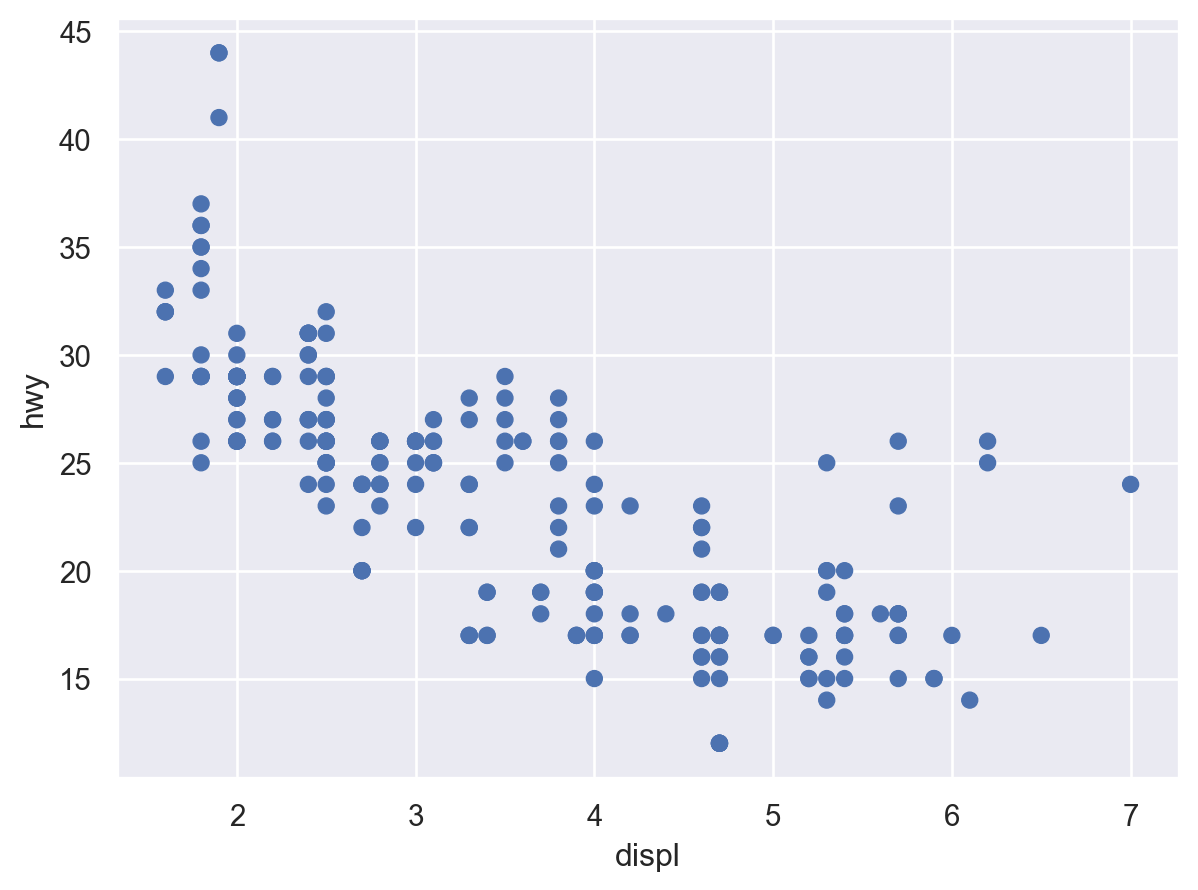

In [7]:
so.Plot(mpg, x="displ", y="hwy").add(so.Dot())

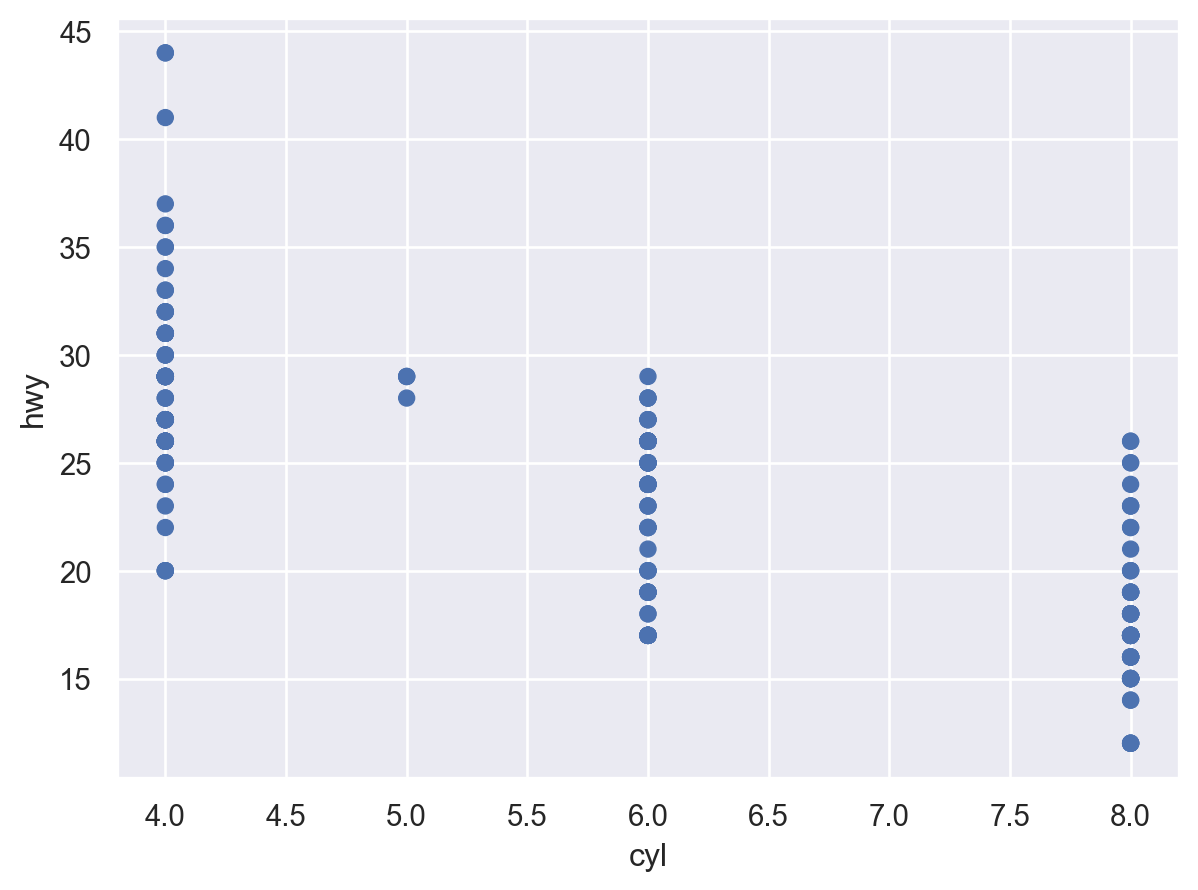

In [8]:
(
    so.Plot(mpg, x="cyl", y="hwy")
    .add(so.Dot()) 
)

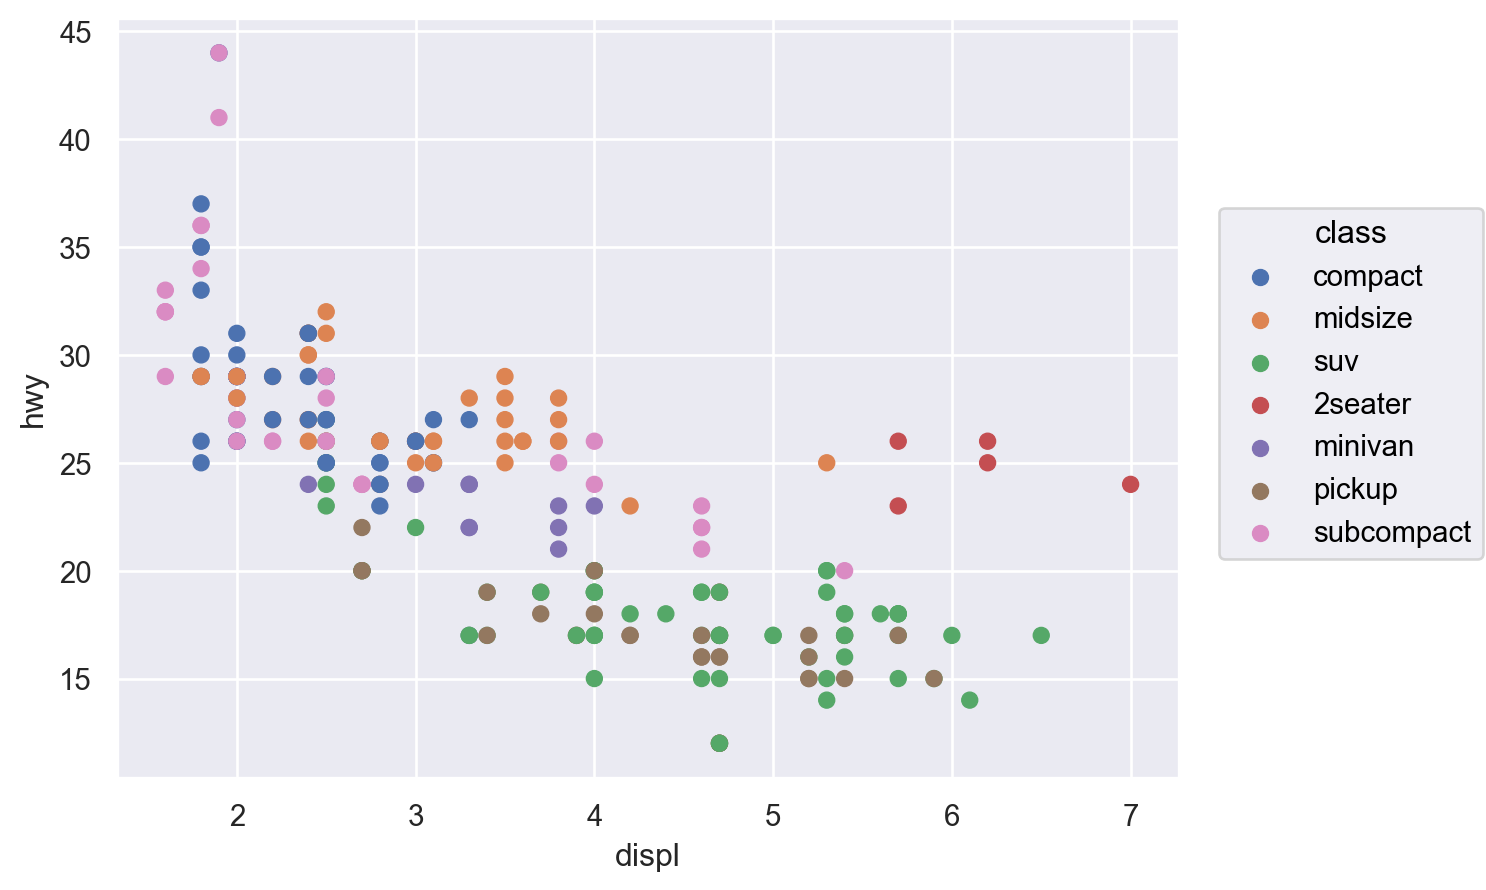

In [26]:
(
    so.Plot(mpg, x="displ", y="hwy", color="class")
    .add(so.Dot())
)

In [10]:
penguins = sns.load_dataset("penguins") # load a dataset: penguins
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,Male
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,Female
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,Female


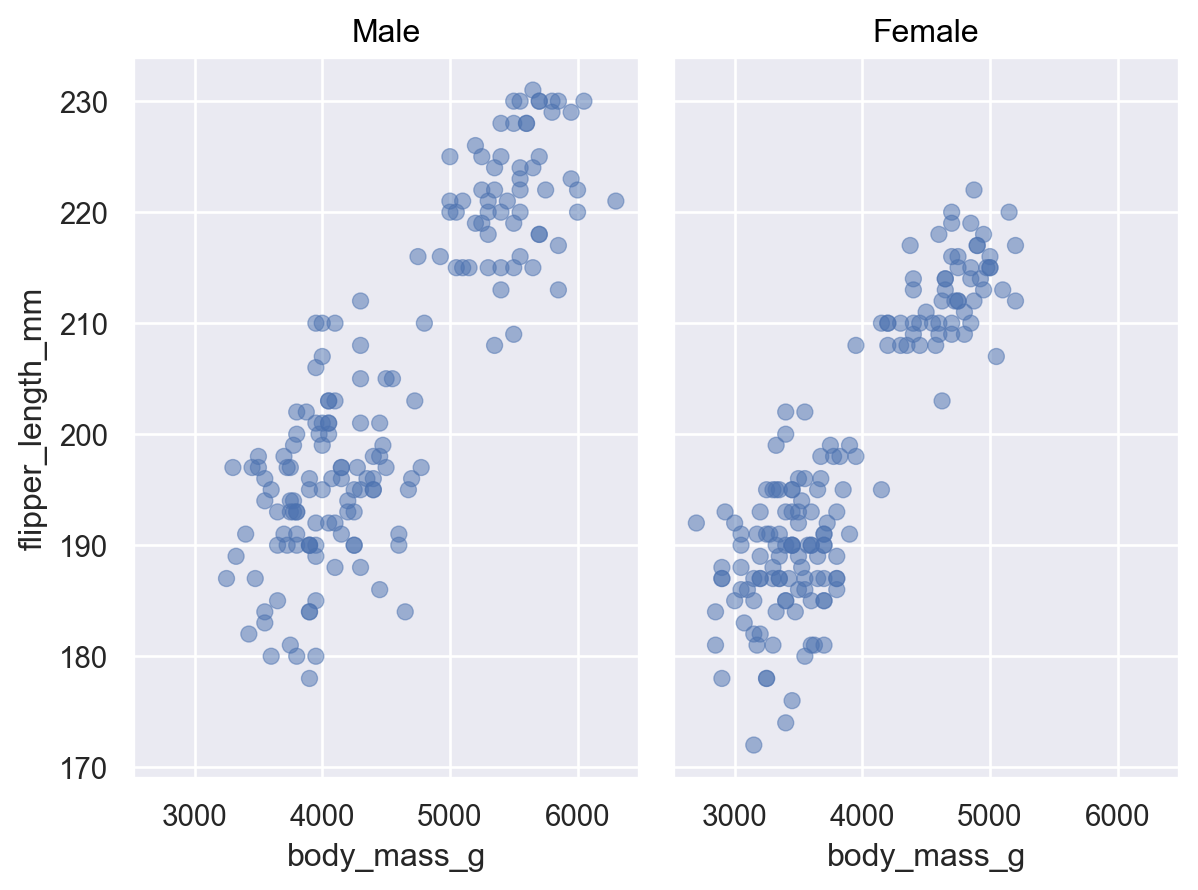

In [11]:
(
    so.Plot(penguins, x="body_mass_g", y="flipper_length_mm")
    .add(so.Dot(alpha=.5))
    .facet("sex")  # 기본적으로 columns으로 나누어져 그림, wrap: column에 몇 개까지 그릴지
)

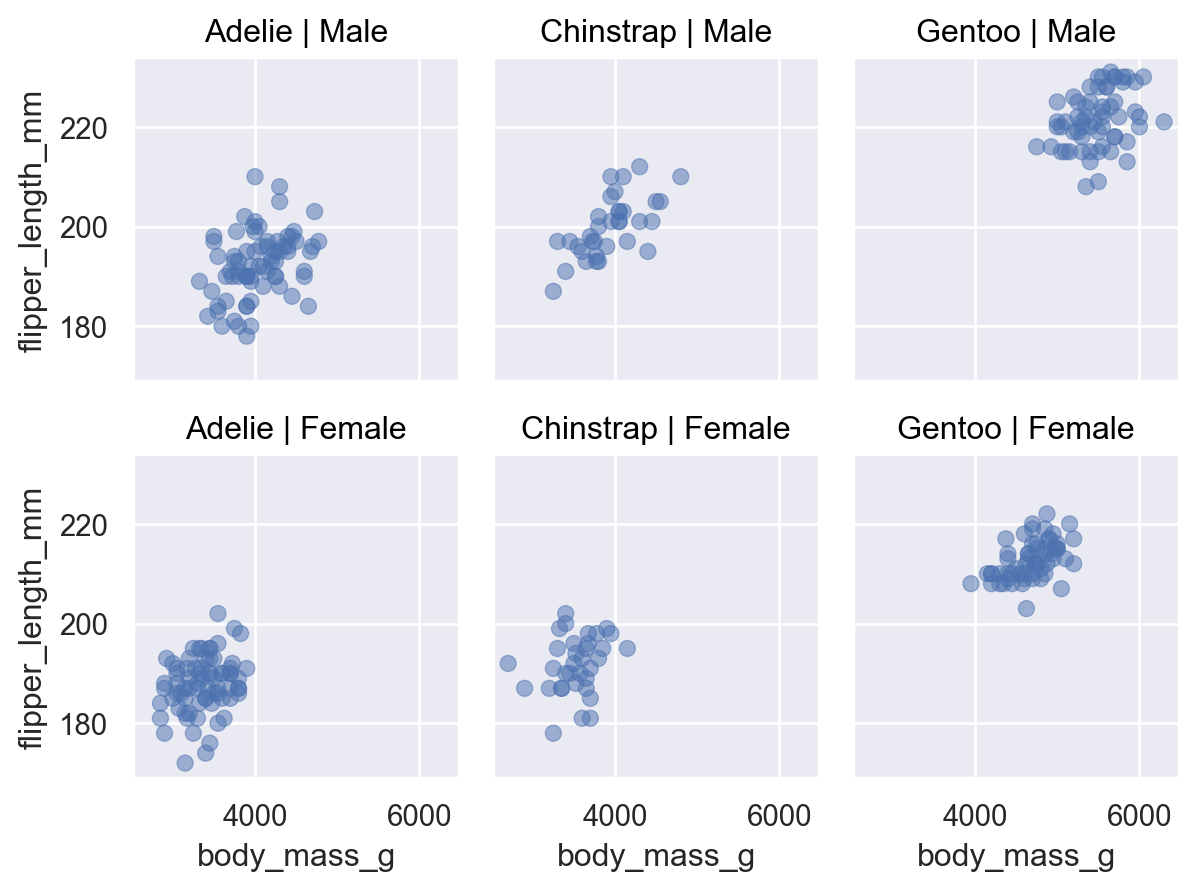

In [12]:
p = (
    so.Plot(penguins, x="body_mass_g", y="flipper_length_mm")
    .facet(col="species", row="sex")
    .add(so.Dot(alpha=.5))
)
p

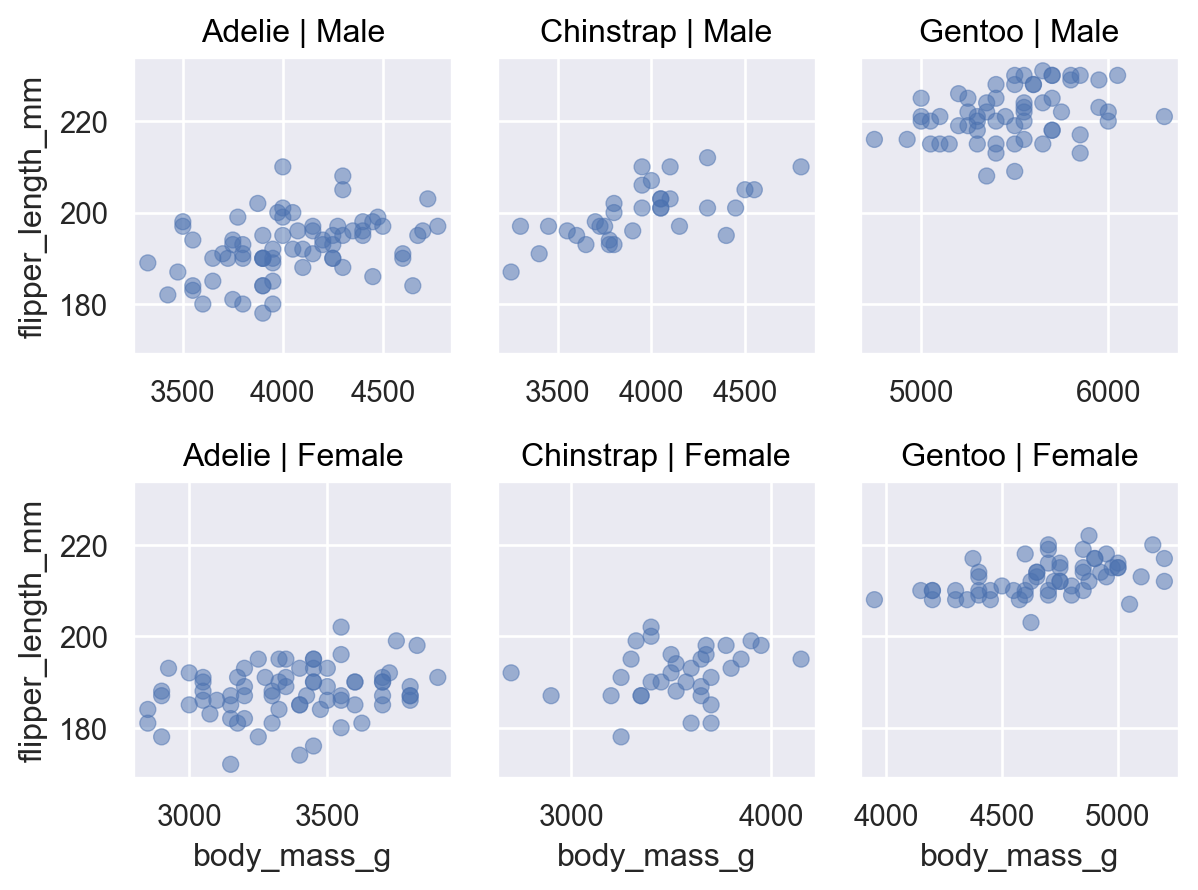

In [13]:
p.share(x=False, y=True)

In [22]:
left = (
    so.Plot(penguins, x="body_mass_g", y="flipper_length_mm")
    .facet(col="species")
    .add(so.Dot(alpha=.5))
)

right = (
    so.Plot(penguins, x="body_mass_g", y="flipper_length_mm", color="species")
    .add(so.Dot(alpha=.5))
)

bottom = (
    so.Plot(penguins, x="body_mass_g", y="flipper_length_mm")
    .facet(row="species")
    .add(so.Dot(alpha=.5))
)

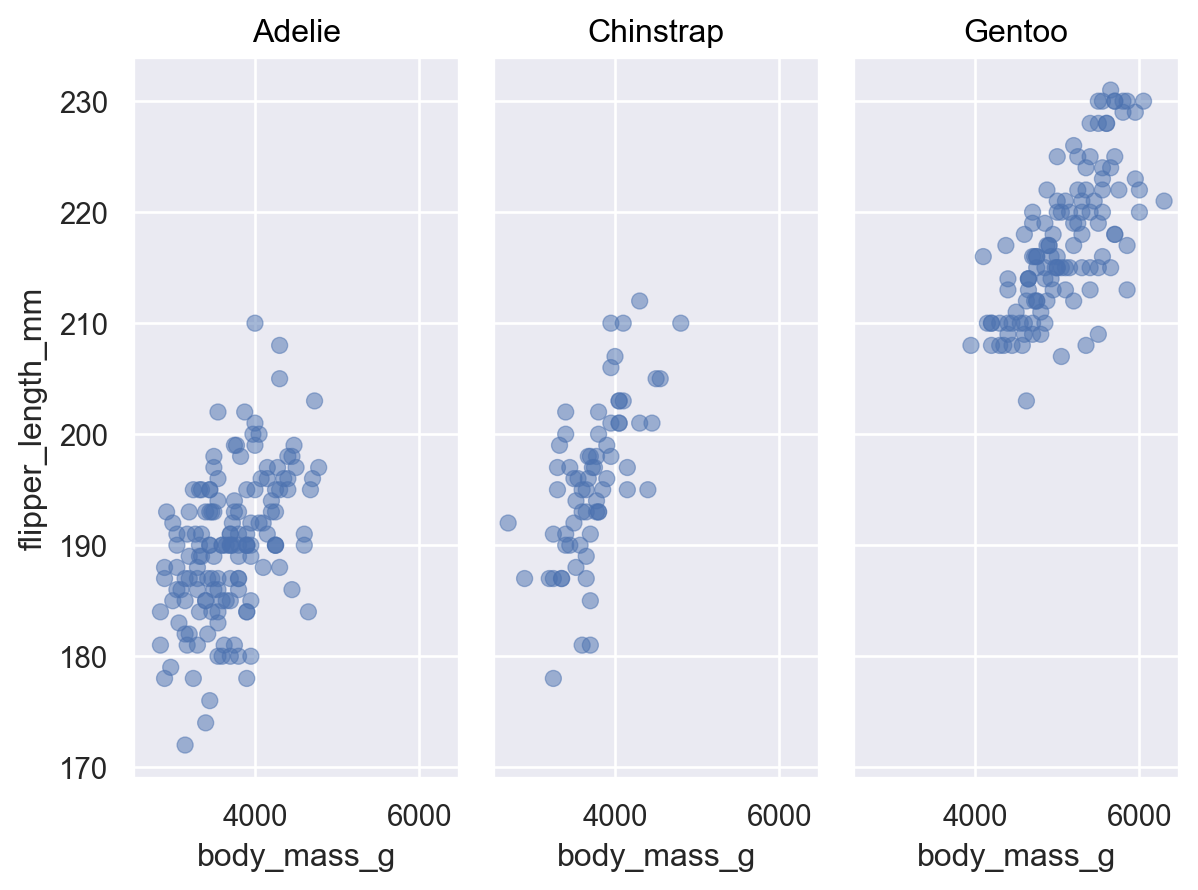

In [19]:
left

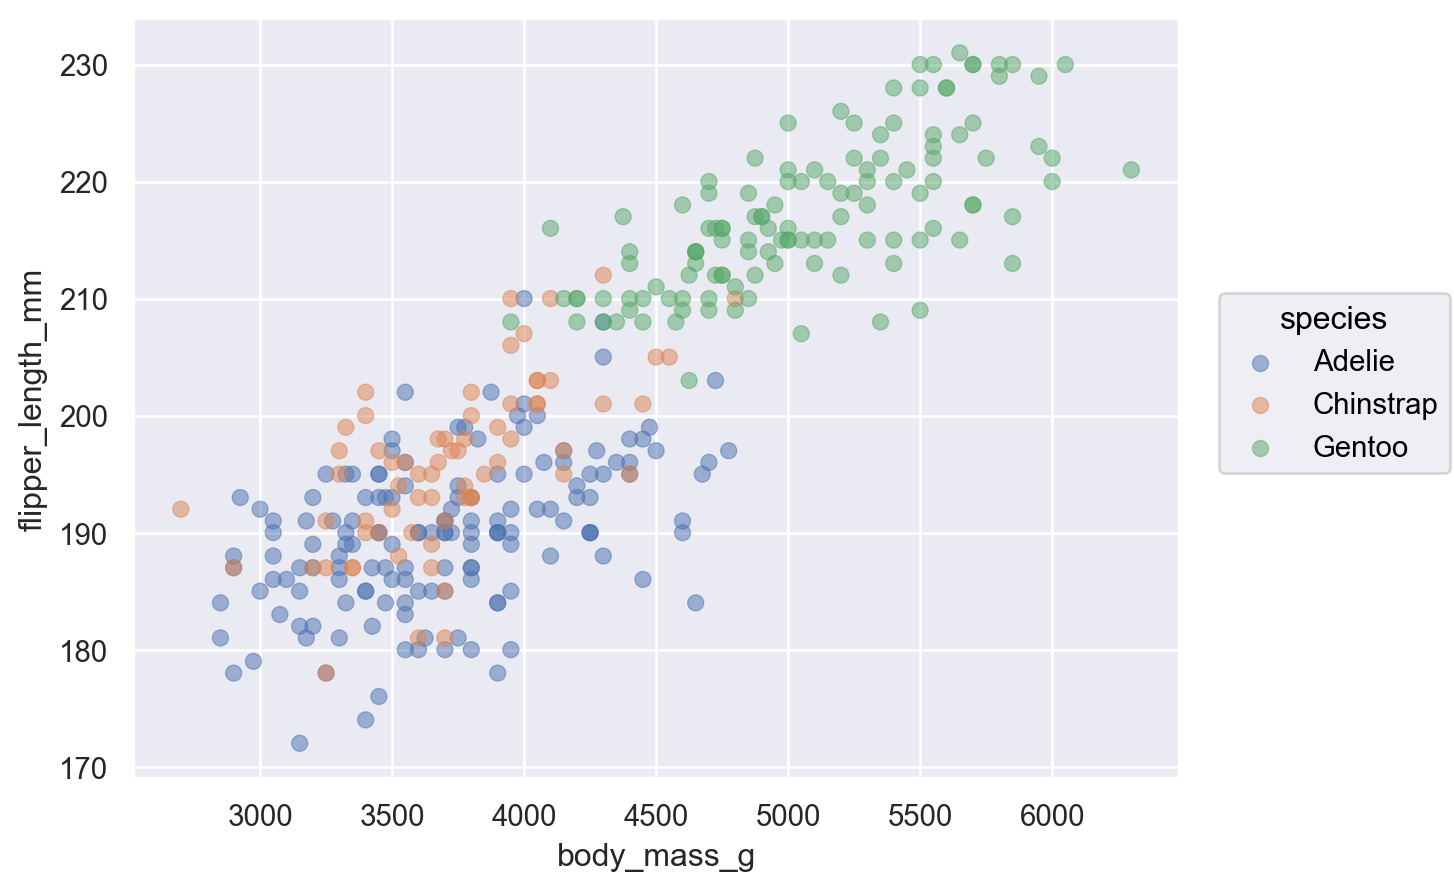

In [20]:
right

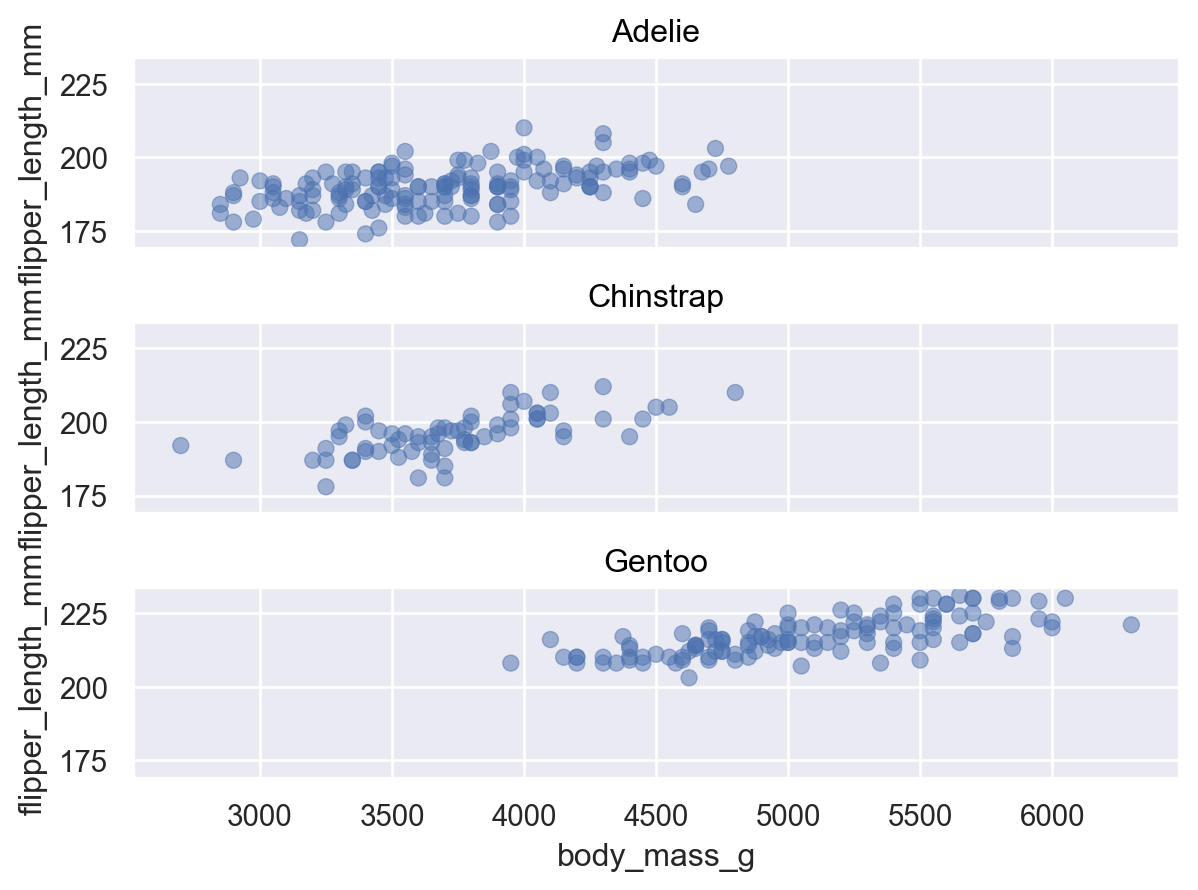

In [21]:
bottom

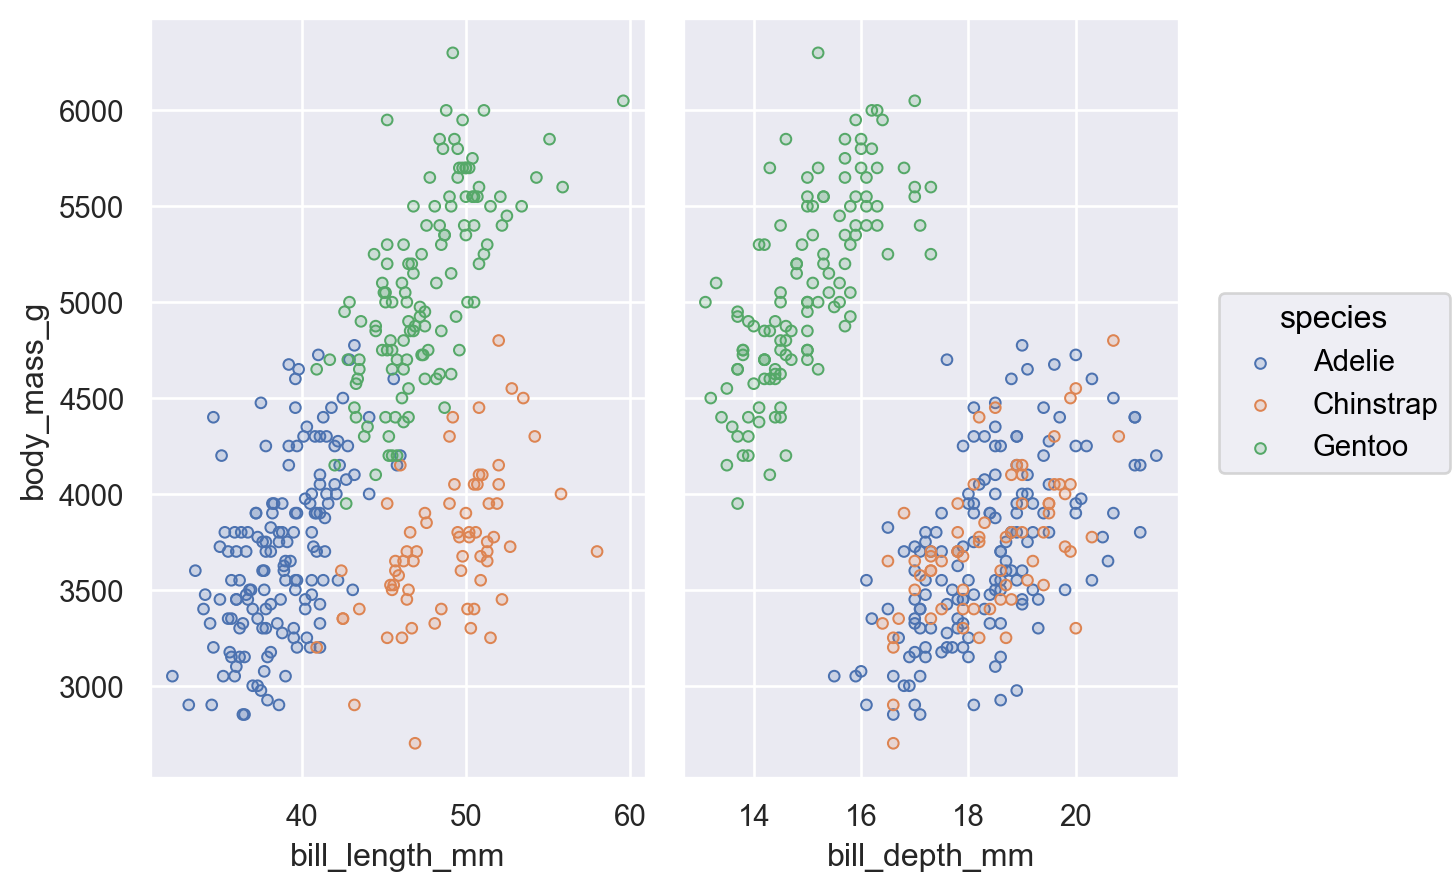

In [23]:
(
    so.Plot(penguins, y="body_mass_g", color="species")  # y축은 공유
    .pair(x=["bill_length_mm", "bill_depth_mm"])  # x축에 다른 변수를 mapping
    .add(so.Dots())  # .Dots()! overploting에 유리. .Dot(alpha=.)로도 비슷
)

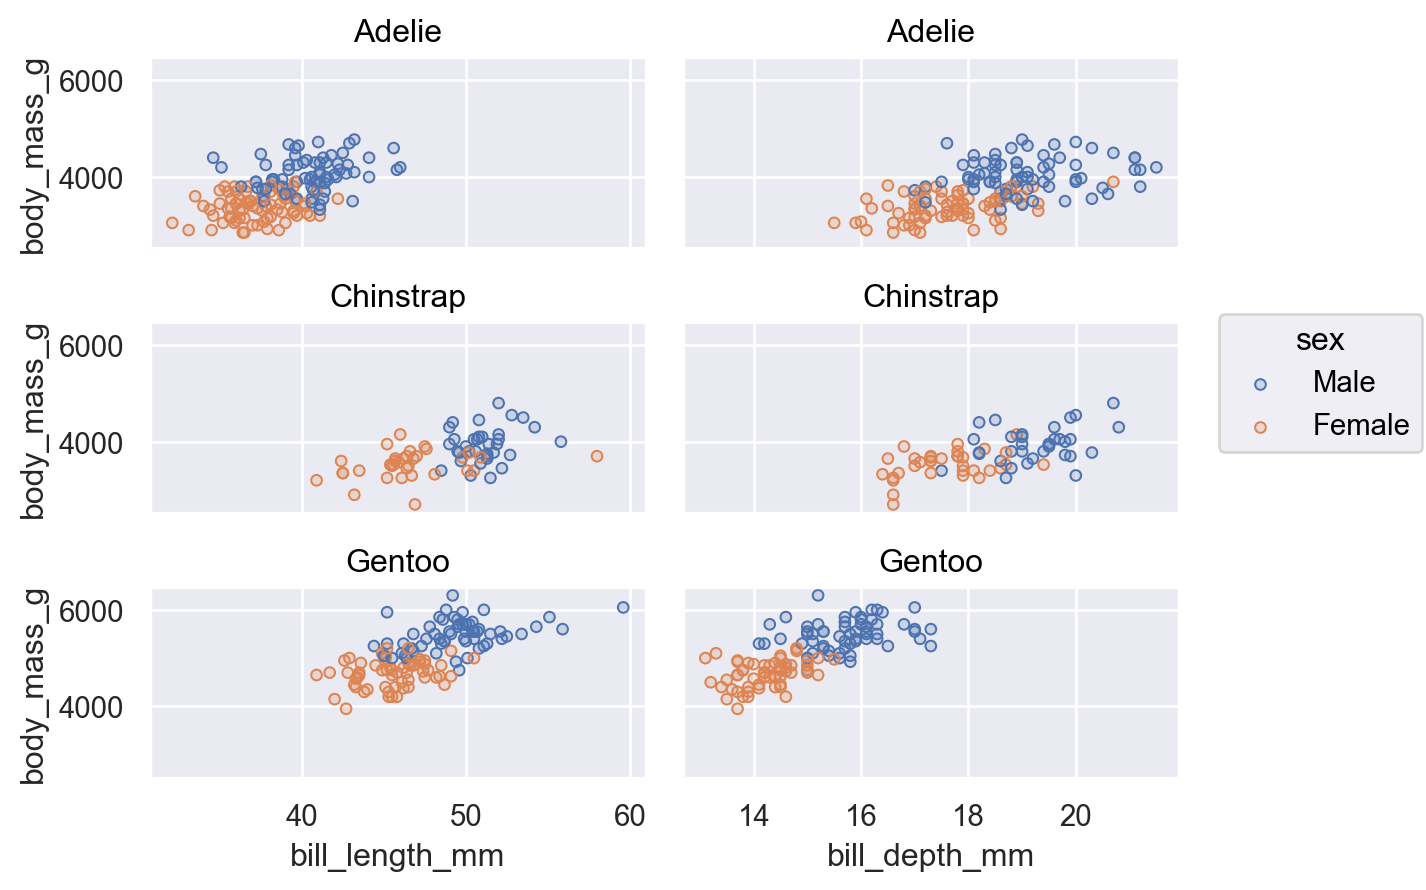

In [24]:
(
    so.Plot(penguins, y="body_mass_g", color="sex")
    .pair(x=["bill_length_mm", "bill_depth_mm"])
    .facet(row="species")
    .add(so.Dots())
)

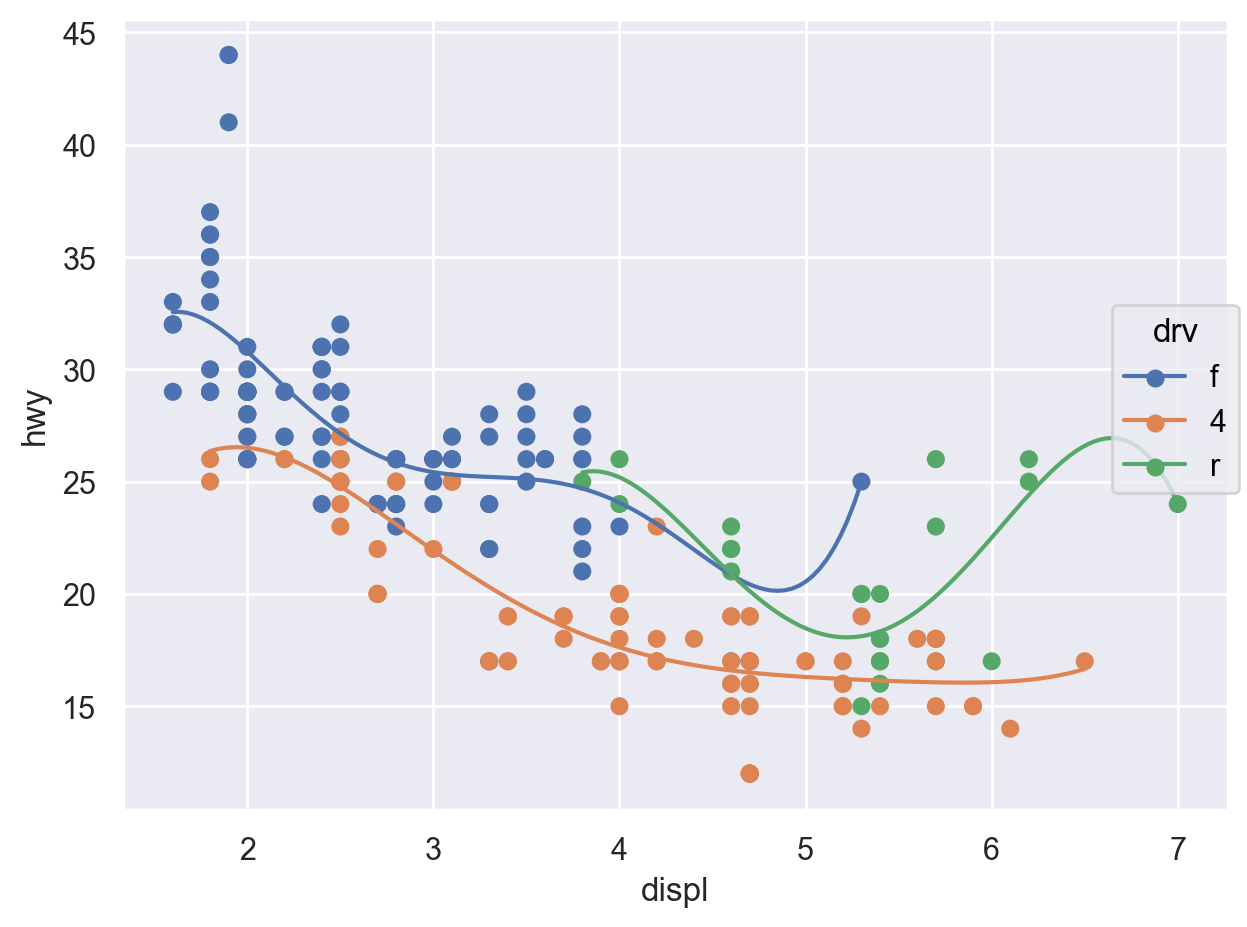

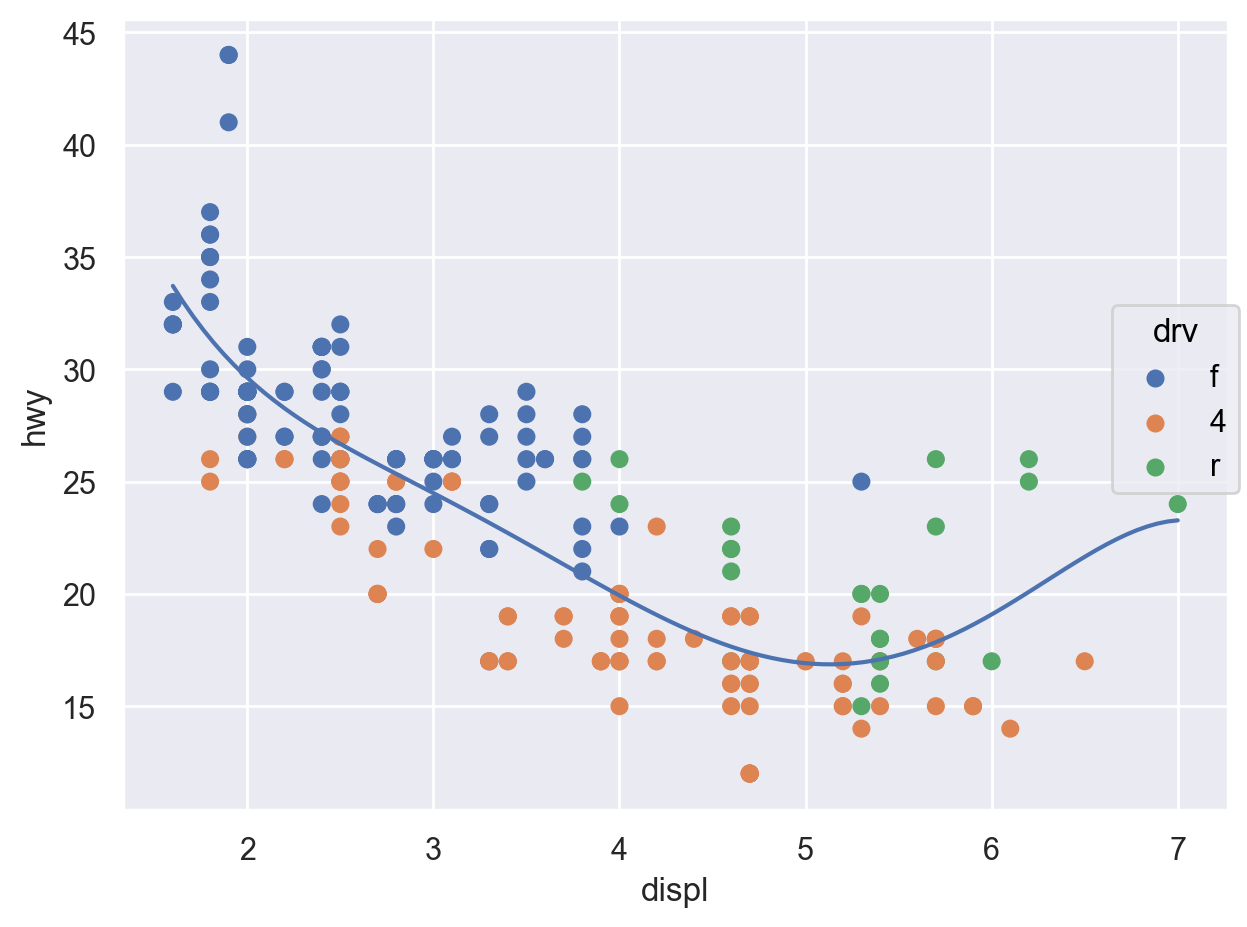

In [32]:
left = (
    so.Plot(mpg, x="displ", y="hwy", color="drv")  # color mapping이 이후 모든 layer에 적용
    .add(so.Dot())
    .add(so.Line(), so.PolyFit(5))
).show() # 모든 layer에 적용된 상태 -> color도 각각 적용, line도 각각 적용

right = (
    so.Plot(mpg, x="displ", y="hwy")
    .add(so.Dot(), color="drv")  # color mapping이 이 layer에만 적용
    .add(so.Line(), so.PolyFit(5))
).show()

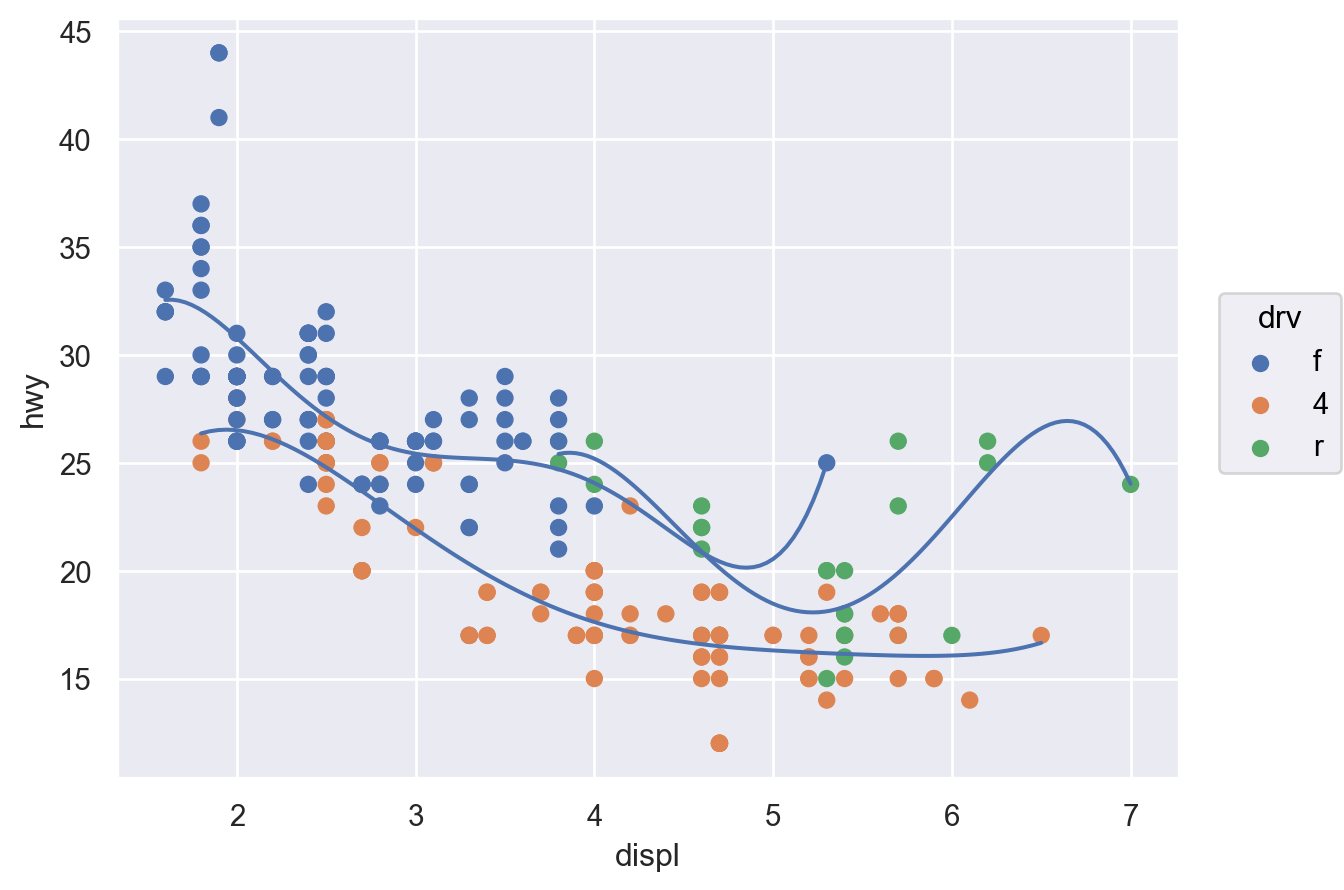

In [33]:
(
    so.Plot(mpg, x="displ", y="hwy")
    .add(so.Dot(), color="drv")
    .add(so.Line(), so.PolyFit(5), group="drv") # color가 아닌 group으로 grouping
)
# 다항함수 fit의 특징 및 주의점

In [35]:
tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


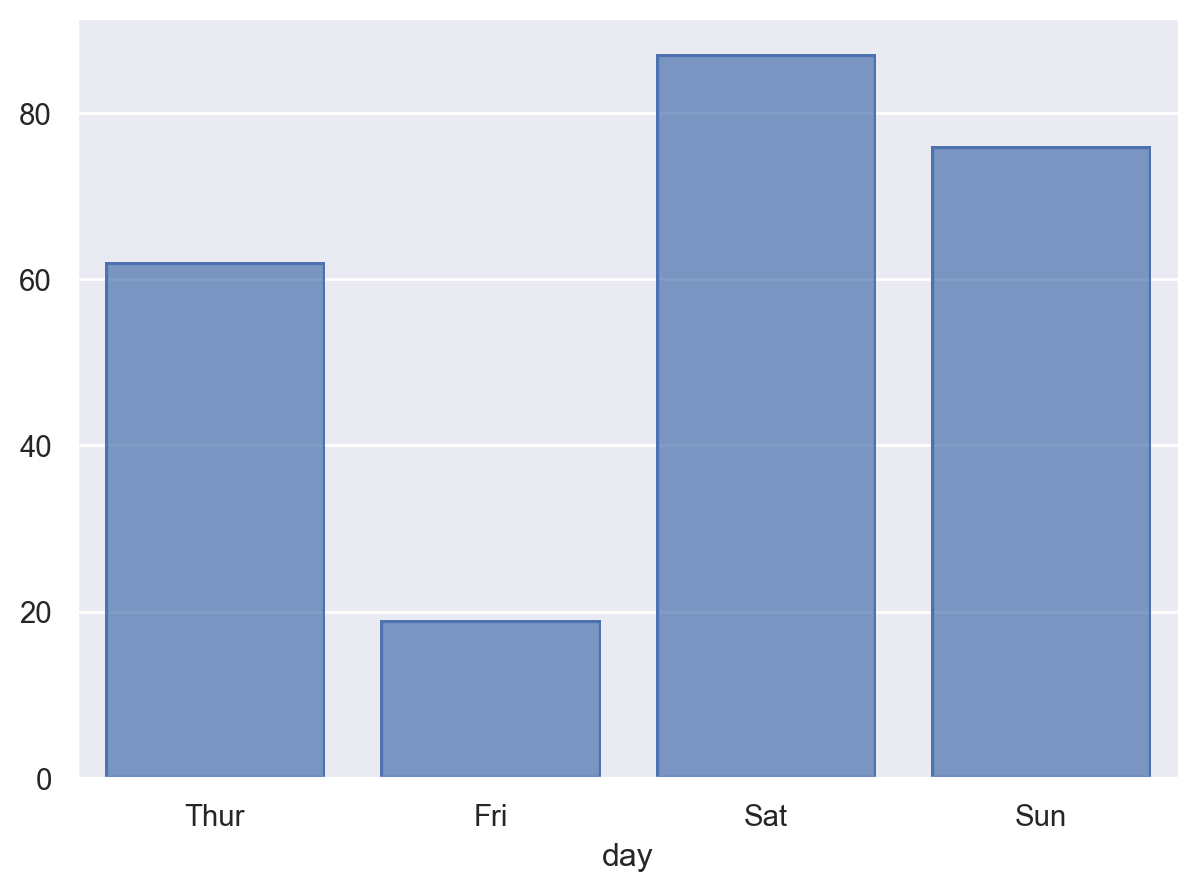

In [38]:
(
    so.Plot(tips, x="day")
    .add(so.Bar(), so.Count())  # category type의 변수는 순서가 존재. 
                                # 그렇지 않은 경우 알바벳 순서로. 
)

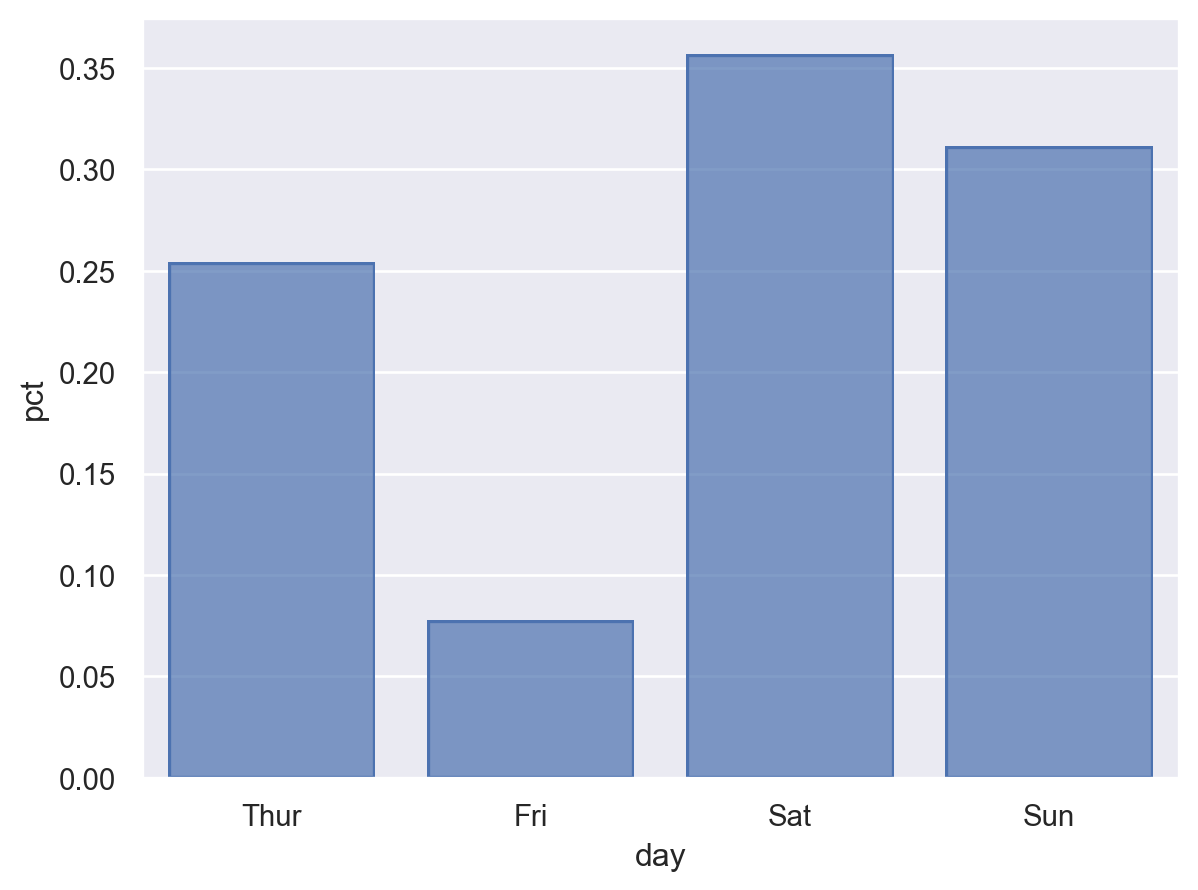

In [39]:
count_day = tips.value_counts("day", normalize=True).reset_index(name="pct")

(
    so.Plot(count_day, x="day", y="pct")
    .add(so.Bar())
)